In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.integrate import quad
from scipy.fft import fft, ifft
from scipy.interpolate import interp1d
import scipy.integrate as integrate
from functools import partial
from scipy.optimize import minimize, fsolve, basinhopping
import tqdm
import yfinance as yf
import yahoo_fin.options as ops
import cmath

%matplotlib inline

plt.style.use('ggplot')
sns.set_palette('mako')
sns.set_style('darkgrid')

## DCL process

In [208]:
def dclProcess(NumberPaths, N, T, x0, theta, delta):
    Z1 = np.random.normal(0.0, 1.0,[NumberPaths,N])
    X = np.zeros([NumberPaths, N + 1])

    X[:, 0] = x0

    time = np.zeros([N+1])
    dt = T / float(N)
    
    for i in range(0, N):

        X[:,i+1] = X[:, i] - 1/theta * X[:,i] * dt + np.sqrt((1 - (X[:, i])**2)/(theta * (delta + 1))) * np.sqrt(dt) * Z1[:,i]
            
        if (X[:,i+1] > 1).any():
            X[np.where(X[:,i+1] > 1)[0], i+1] = 0.9999

        if (X[:,i+1] < -1).any():
            X[np.where(X[:,i+1] < -1)[0], i+1] = -0.9999 
            
        time[i+1] = time[i] + dt

    return time, X

In [209]:
rho0 = 0.04
theta = 5
time, dclpaths = dclProcess(10000, 100, 10, rho0, theta, 2)

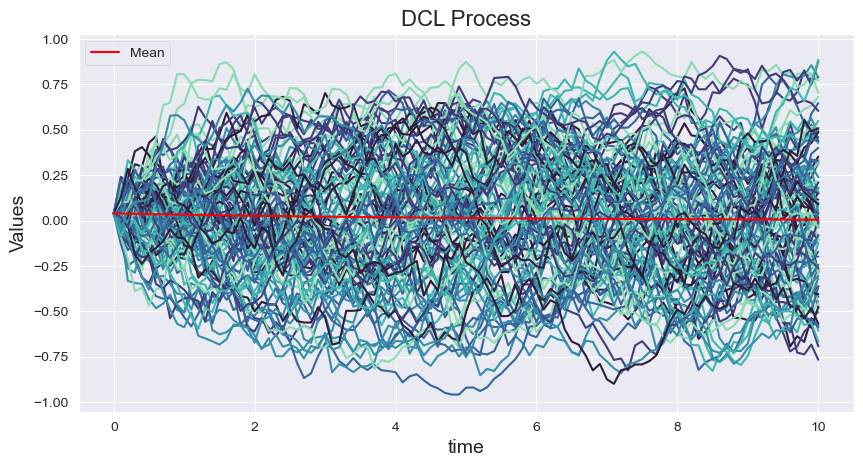

In [210]:
plt.subplots(figsize=(10, 5), dpi=100)

for i in range(100):
    plt.plot(time, dclpaths[i])
        
    plt.title('DCL Process', fontsize=16)
    plt.xlabel('time', fontsize=14)
    plt.ylabel('Values', fontsize=14)

plt.plot(time, np.exp(-1/theta * time)*rho0, color='red', label='Mean')
plt.legend()
plt.show()

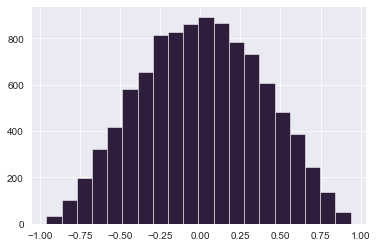

In [211]:
plt.hist(dclpaths[:, -1], bins=20)
plt.show()

## Jacobi process

In [212]:
def jacobiProcess(NumberPaths, N, T, x0, krho, murho, sigmarho):
    Z1 = np.random.normal(0.0, 1.0,[NumberPaths,N])
    X = np.zeros([NumberPaths, N + 1])

    X[:, 0] = x0

    time = np.zeros([N+1])
    dt = T / float(N)
    
    for i in range(0, N):

        X[:,i+1] = X[:, i] + krho * (murho - X[:,i]) * dt + sigmarho * np.sqrt(1-X[:,i]**2) * np.sqrt(dt) * Z1[:,i]
            
        if (X[:,i+1] > 1).any():
            X[np.where(X[:,i+1] > 1)[0], i+1] = 0.9999

        if (X[:,i+1] < -1).any():
            X[np.where(X[:,i+1] < -1)[0], i+1] = -0.9999  
            
        time[i+1] = time[i] + dt

    return time, X

In [213]:
rho0 = 0.04
krho = 0.1
murho = 0.25
time, jacobipath = jacobiProcess(10000, 100, 10, rho0, krho, murho, 0.3)

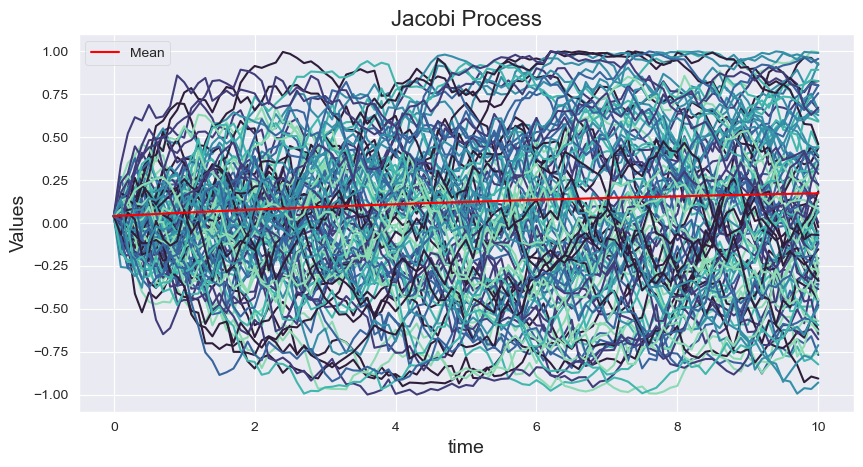

In [214]:
plt.subplots(figsize=(10, 5), dpi=100)

for i in range(100):
    plt.plot(time, jacobipath[i])
        
    plt.title('Jacobi Process', fontsize=16)
    plt.xlabel('time', fontsize=14)
    plt.ylabel('Values', fontsize=14)

plt.plot(time, np.exp(-krho*time)*(rho0 - murho) + murho, color='red', label='Mean')
plt.legend()
plt.show()

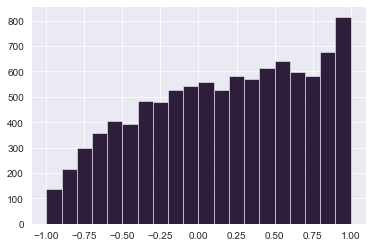

In [215]:
plt.hist(jacobipath[:, -1], bins=20)
plt.show()

## Ornstein-Uhlenbek process

In [216]:
def ornsteinUhlenbekProcess(NumberPaths, N, T, x0, krho, murho, sigmarho):
    Z1 = np.random.normal(0.0, 1.0,[NumberPaths,N])
    X = np.zeros([NumberPaths, N + 1])

    X[:, 0] = x0

    time = np.zeros([N+1])
    dt = T / float(N)
    
    for i in range(0, N):

        X[:,i+1] = X[:, i] + krho * (murho - X[:,i]) * dt + sigmarho * np.sqrt(dt) * Z1[:,i]
            
        if (X[:,i+1] > 1).any():
            X[np.where(X[:,i+1] > 1)[0], i+1] = 0.9999

        if (X[:,i+1] < -1).any():
            X[np.where(X[:,i+1] < -1)[0], i+1] = -0.9999  
            
        time[i+1] = time[i] + dt

    return time, X

In [217]:
rho0 = 0.04
krho = 0.1
murho = 0.25
time, oupaths = ornsteinUhlenbekProcess(10000, 100, 10, rho0, krho, murho, 0.3)

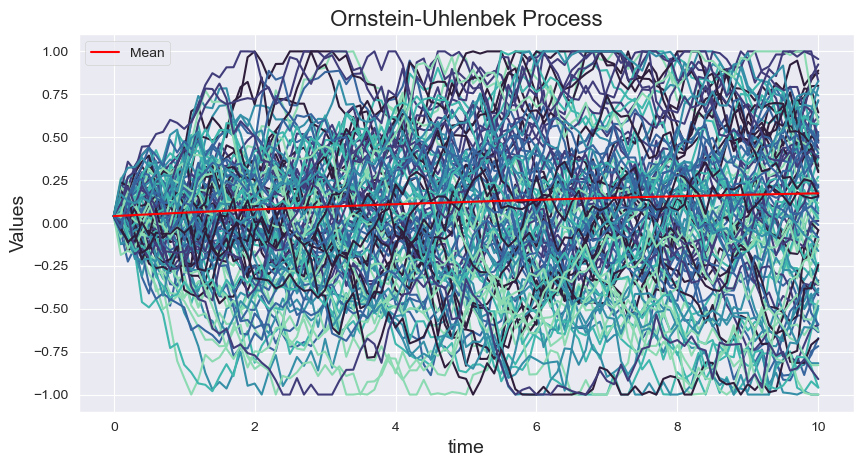

In [218]:
plt.subplots(figsize=(10, 5), dpi=100)

for i in range(100):
    plt.plot(time, oupaths[i])
        
    plt.title('Ornstein-Uhlenbek Process', fontsize=16)
    plt.xlabel('time', fontsize=14)
    plt.ylabel('Values', fontsize=14)

plt.plot(time, np.exp(-krho*time)*(rho0 - murho) + murho, color='red', label='Mean')
plt.legend()
plt.show()

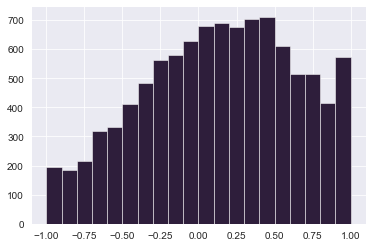

In [219]:
plt.hist(oupaths[:, -1], bins=20)
plt.show()